In [130]:
import pandas as pd
import numpy as np
import plotnine as p9

In [131]:
#Read data file
iris = pd.read_csv('iris.data', header=0)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [132]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [133]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


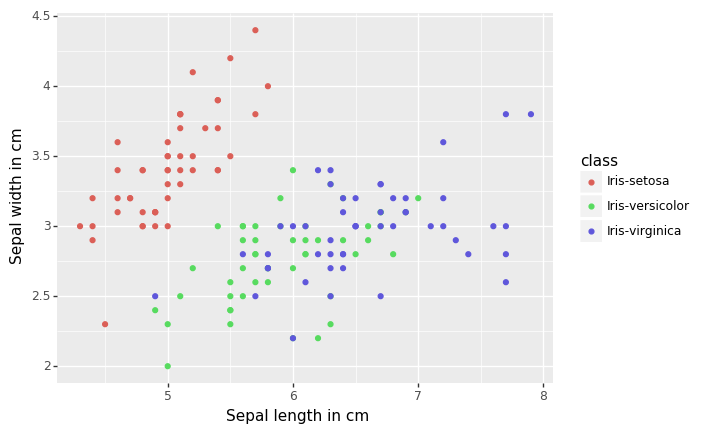

<ggplot: (8774637982509)>

In [134]:
(p9.ggplot(iris, p9.aes(x='sepal_length', y='sepal_width', color='class'))
+ p9.geom_point() 
+ p9.labs(x='Sepal length in cm', y= 'Sepal width in cm'))

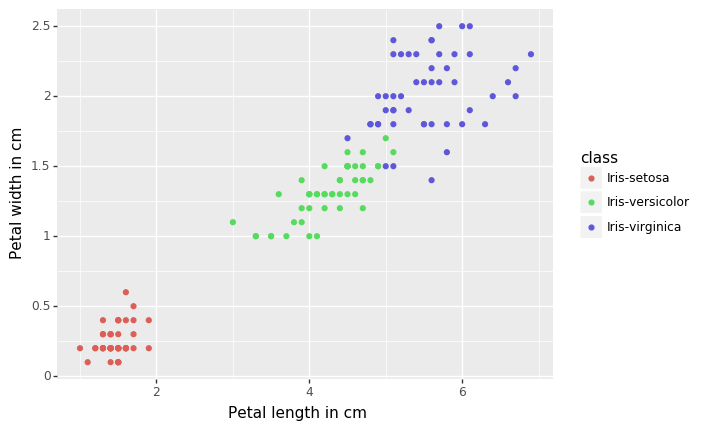

<ggplot: (8774639097353)>

In [135]:
(p9.ggplot(iris, p9.aes(x='petal_length', y='petal_width', color='class'))
+ p9.geom_point()
+ p9.labs(x='Petal length in cm', y= 'Petal width in cm'))

It appears that setosa petals are much smaller than other two species.Versicolor and virginica have a 
slight overlap but virginica appears to have largest petals in the group

# Let's do some Machine Learning

In [136]:
accuracy_tracker={}

In [137]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [138]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [139]:
X = np.array(iris.iloc[:,0:4])
y = np.array(iris['class'])

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=50)

In [140]:
lgr = LogisticRegression(max_iter=1000, C=1.1)
lgr.fit(X_train, y_train)
y_lgr_pred=lgr.predict(X_test)
accuracy_tracker['Logistic Regression']= accuracy_score(y_test, y_lgr_pred)

In [141]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [142]:
parameters = {'n_neighbors':list(range(1,20))}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameters, cv=6, scoring='accuracy')
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [143]:
# Highest accuracy is obtained with n_neighbors=7. Refitting the model with this value
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_knn_pred=knn.predict(X_test)
accuracy_tracker['K Nearest Neighbor @ n_neighbors=8'] = accuracy_score(y_test, y_knn_pred)

In [144]:
#Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
params_rf= {'n_estimators':[100, 200, 500],
              'min_samples_leaf' : [1, 4, 6]}
rf = RandomForestClassifier(random_state=50)
rf_cv = GridSearchCV(rf, param_grid=params_rf, cv= 4, scoring='accuracy')
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'min_samples_leaf': 4, 'n_estimators': 200}

In [147]:
#Highest accuracy is obtained with min_samples_leaf=1 and n_estimators=100. Refit the model with these parameters
rf = RandomForestClassifier(min_samples_leaf = 4, n_estimators= 200, random_state=50)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
accuracy_tracker['Random Forest'] = accuracy_score(y_test, y_rf_pred)

In [148]:
print(accuracy_tracker)

{'Logistic Regression': 0.9666666666666667, 'K Nearest Neighbor @ n_neighbors=8': 0.9666666666666667, 'Random Forest': 0.9666666666666667}


This is really interesting that all three models have the same accuracy of 96.67%. Believe me, I did change parameters and the accuracy changed so the code is correct :-)